In [62]:
#import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import deque

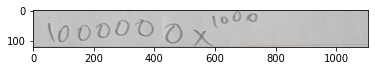

In [63]:
img = cv2.imread("../input/polynomial-dataset/Polynomial data/polynomial pics/page 1 (41 pics)/6.png")
plt.imshow(img, cmap='gray')

In [64]:
img = cv2.resize(img, (img.shape[1]//4, img.shape[0]//4))

[[[215 215 215]
  [215 215 215]
  [215 218 218]
  ...
  [195 199 202]
  [197 202 204]
  [199 204 206]]

 [[215 218 213]
  [211 211 211]
  [213 218 215]
  ...
  [199 204 206]
  [204 209 211]
  [195 199 202]]

 [[215 218 215]
  [211 213 211]
  [215 218 218]
  ...
  [195 199 202]
  [199 204 204]
  [188 192 195]]

 ...

 [[202 204 204]
  [204 202 206]
  [209 209 211]
  ...
  [190 188 186]
  [186 183 183]
  [183 179 179]]

 [[209 209 209]
  [197 197 197]
  [211 211 211]
  ...
  [186 186 181]
  [179 179 179]
  [186 179 181]]

 [[176 176 176]
  [170 170 170]
  [186 183 181]
  ...
  [192 199 199]
  [192 204 202]
  [199 204 204]]]


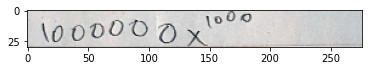

In [65]:
minPixel = np.min(img)
maxPixel = np.max(img)

lut = np.zeros(256, dtype=np.uint8)
lut[minPixel:maxPixel+1]=np.linspace(start=0,stop=255,num=(maxPixel-minPixel)+1,endpoint=True,dtype=np.uint8)

plt.imshow(lut[img])
print(lut[img])
img = lut[img]

In [66]:
vis = np.zeros((img.shape[0], img.shape[1]))
newvis = np.zeros((img.shape[0], img.shape[1]))
print(vis.shape, img.shape)

top = img.shape[0]
bottom = 0
left = img.shape[1]
right = 0

def floodFill(x, y, minval, img):
    global top, bottom, newvis, left, right, vis
    #print("asdf")
    if(x < 0 or y < 0 or x >= img.shape[0] or y >= img.shape[1]):
        #print("a;lskdjfnalsdjkfnaskdfnakjsdnfkj")
        return
    if(newvis[x][y] == 1):
        return
    #print(x, y)
    if(sum(img[x][y])/3 > minval):
        return
    newvis[x][y] = 1
    top = min(top, x)
    bottom = max(bottom, x)
    left = min(left, y)
    right = max(right, y)
    
    floodFill(x+1, y, minval, img)
    floodFill(x-1, y, minval, img)
    floodFill(x, y+1, minval, img)
    floodFill(x, y-1, minval, img)
    floodFill(x+1, y+1, minval, img)
    floodFill(x-1, y+1, minval, img)
    floodFill(x+1, y-1, minval, img)
    floodFill(x-1, y-1, minval, img)

(30, 276) (30, 276, 3)


In [67]:
import sys
sys.setrecursionlimit(100000)

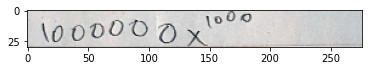

In [68]:
vis = np.zeros((img.shape[0], img.shape[1]))
plt.imshow(img)
#print(vis[30])
boxes = []
symbols = 0

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        #print(img[i][j])
        #print(sum(img[i][j]) > 240*3)
        #pass
        
        if(vis[i][j] == 0 and sum(img[i][j])/3 < 170):
            #print(i, j)
            newvis = np.zeros((img.shape[0], img.shape[1]))
            top = img.shape[0]
            bottom = 0
            left = img.shape[1]
            right = 0
            floodFill(i, j, 170, img)
            #symbols += 1
            
            #print(top, left, bottom, right)
            if(np.sum(newvis) > 10):
                symbols += 1
                vis = vis + newvis
                boxes.append([left, right, bottom, top])
        

In [69]:
print(np.sum(vis))

577.0


In [70]:
print(boxes)

[[164, 171, 8, 1], [176, 184, 9, 3], [147, 151, 14, 5], [154, 160, 10, 5], [67, 79, 20, 8], [84, 99, 21, 8], [12, 17, 25, 11], [52, 63, 22, 11], [108, 122, 26, 11], [21, 29, 25, 12], [37, 47, 24, 12], [132, 148, 29, 16]]


12


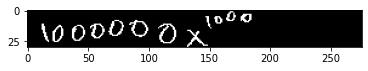

In [71]:
plt.imshow(vis*255, cmap="gray")
print(symbols)